

- [Jacques J. F. Commandeur and Siem Jan Koopman, An Introduction to State Space Time Series Analysis (Practical Econometrics) ](https://www.amazon.co.jp/dp/0199228876/ref=cm_sw_r_tw_dp_897A7MBN34NXEFDWYPHF?_encoding=UTF8&psc=1)
    - Data: http://www.ssfpack.com/CKbook.html
    - Japanese Translation: [状態空間時系列分析入門   J.J.F. コマンダー ](https://www.amazon.co.jp/dp/4916092929/ref=cm_sw_r_tw_dp_ENXRFY89QBMRWFVPDVMG )

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import chi2, f as fdist
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

## Data

### UK drivers KSI (killed or seriously injured)

In [2]:
df_ukdrivers = pd.read_csv('../data/ckbook/UKdriversKSI.txt', skiprows=[0], header=None)
df_ukdrivers.columns = ['drivers']
df_ukdrivers['log_drivers'] = np.log(df_ukdrivers['drivers'])
df_ukdrivers['index'] = df_ukdrivers.index + 1
df_ukdrivers.index = pd.date_range(start='1969-01', periods=df_ukdrivers.shape[0], freq='M')
df_ukdrivers.head()

,drivers,log_drivers,index
1969-01-31,1687,7.430707,1
1969-02-28,1508,7.318540,2
1969-03-31,1507,7.317876,3
1969-04-30,1385,7.233455,4
1969-05-31,1632,7.397562,5


<AxesSubplot:xlabel='time (month)', ylabel='$\\log$ KSI'>

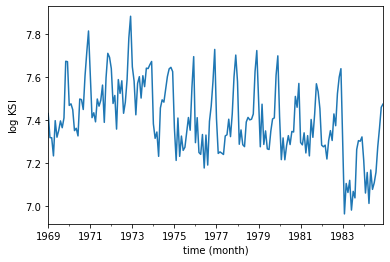

In [3]:
df_ukdrivers['log_drivers'].plot(xlabel='time (month)', ylabel='$\log$ KSI')

### UK Petrol Price

In [4]:
df_ukpetrol = pd.read_csv('../data/ckbook/logUKpetrolprice.txt')
df_ukpetrol.columns = ['log_petrol_price']
df_ukpetrol.index = pd.date_range(start='1969-01', periods=df_ukpetrol.shape[0], freq='M')
df_ukpetrol.head()

,log_petrol_price
1969-01-31,-2.27330
1969-02-28,-2.27923
1969-03-31,-2.28217
1969-04-30,-2.29389
1969-05-31,-2.29244


<AxesSubplot:>

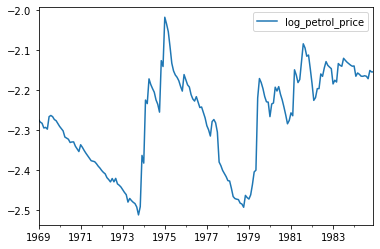

In [5]:
df_ukpetrol.plot()

### Fatalties in Norway and Finland

In [6]:
df_fatalties = pd.read_table('../data/ckbook/NorwayFinland.txt', skiprows=[0], header=None)
df_fatalties.columns = ['year', 'Norwegian_fatalities', 'Finnish_fatalities']
df_fatalties.index = pd.date_range(start='1970', periods=df_fatalties.shape[0], freq='y')
df_fatalties['log_Norwegian_fatalties'] = np.log(df_fatalties['Norwegian_fatalities'])
df_fatalties['log_Finnish_fatalties'] = np.log(df_fatalties['Finnish_fatalities'])
df_fatalties.head()

,year,Norwegian_fatalities,Finnish_fatalities,log_Norwegian_fatalties,log_Finnish_fatalties
1970-12-31,1970,560,1055,6.327937,6.961296
1971-12-31,1971,533,1143,6.278521,7.041412
1972-12-31,1972,490,1156,6.194405,7.052721
1973-12-31,1973,511,1086,6.236370,6.990257
1974-12-31,1974,509,865,6.232448,6.762730


<AxesSubplot:>

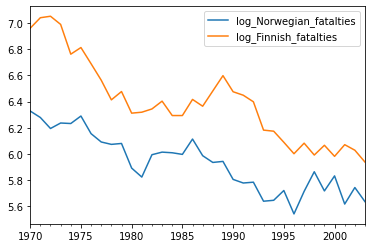

In [7]:
df_fatalties.plot(y=['log_Norwegian_fatalties', 'log_Finnish_fatalties'])

### UK Inflation

In [8]:
df_ukinflation = pd.read_csv('../data/ckbook/UKinflation.txt')
df_ukinflation.index = pd.date_range(start='1950-01', periods=df_ukinflation.shape[0], freq='Q')
df_ukinflation.columns=['q_price_changes']
df_ukinflation.head()

,q_price_changes
1950-03-31,0.008449
1950-06-30,-0.005049
1950-09-30,0.003846
1950-12-31,0.021429
1951-03-31,0.023284


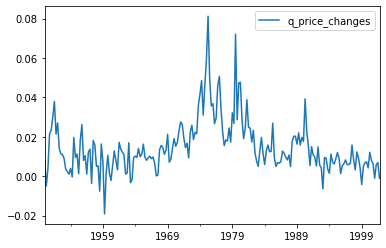

In [9]:
ax=df_ukinflation.plot(label='quarterly price changes in UK')
ax.legend()

# Chapter 1: Introduction

- Linear regression for UK drivers killed or seriously injured (KSI)

In [10]:
exog = sm.add_constant(df_ukdrivers['index'], prepend=False)
ols_model = sm.OLS(df_ukdrivers['log_drivers'], exog)

In [11]:
ols_result = ols_model.fit()

In [12]:
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_drivers   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     53.77
Date:                Sat, 20 Feb 2021   Prob (F-statistic):           6.31e-12
Time:                        21:28:14   Log-Likelihood:                 90.714
No. Observations:                 192   AIC:                            -177.4
Df Residuals:                     190   BIC:                            -170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
index         -0.0014      0.000     -7.333      0.000      -0.002      -0.001
const          7.5458      0.022    343.387      0.000       7.502       7.589
==============================================================================
Omnibus:                        4.967   Durbin-Watson:                   0.711
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.682
Skew:                           0.325   Prob(JB):                       0.0962
Kurtosis:                       2.596   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

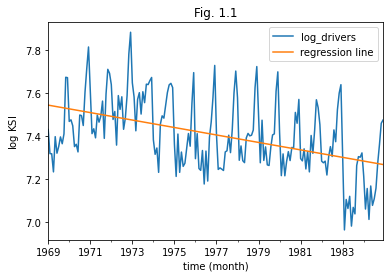

In [13]:
df_ukdrivers['log_drivers'].plot(xlabel='time (month)', ylabel='$\log$ KSI')
ax = ols_result.fittedvalues.plot(label='regression line')
ax.set_title('Fig. 1.1')
ax.legend()

Text(0.5, 1.0, 'Fig. 1.3')

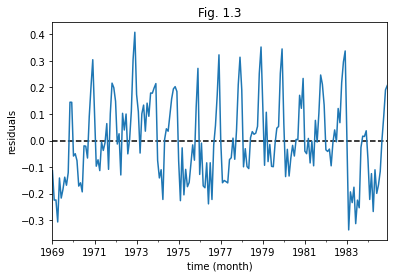

In [14]:
ax = ols_result.wresid.plot(xlabel='time (month)', ylabel='residuals')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 1.3')

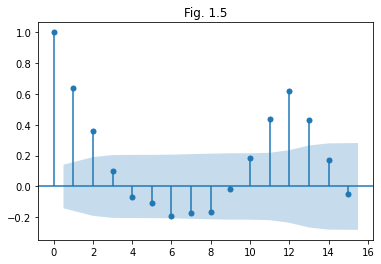

In [15]:
sm.tsa.graphics.plot_acf(ols_result.wresid, lags=15, title='Fig. 1.5');

# Chapter 2

As for the diagnostic tests, see also Chapter 8.

## Deterministic Level

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_1 + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)
\end{aligned}
$$

In [16]:
dconstant_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='deterministic constant', use_exact_diffuse=True)

In [17]:
dconstant_results = dconstant_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.324974
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10


In [18]:
dconstant_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Unobserved Components Results                           
==================================================================================
Dep. Variable:                log_drivers   No. Observations:                  192
Model:             deterministic constant   Log Likelihood                  62.395
Date:                    Sat, 20 Feb 2021   AIC                           -120.790
Time:                            21:28:15   BIC                           -114.275
Sample:                        01-31-1969   HQIC                          -118.151
                             - 12-31-1984                                         
Covariance Type:                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0294      0.003      8.987      0.000       0.023       0.036
===================================================================================
Ljung-Box (L1) (Q):                  94.66   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.00   Prob(JB):                         0.69
Heteroskedasticity (H):               2.06   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

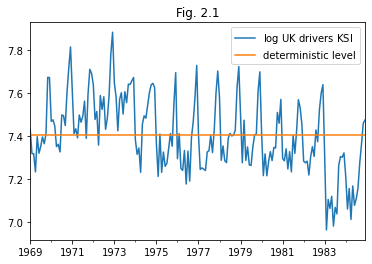

In [19]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dconstant_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level')
ax.set_title('Fig. 2.1')
ax.legend()

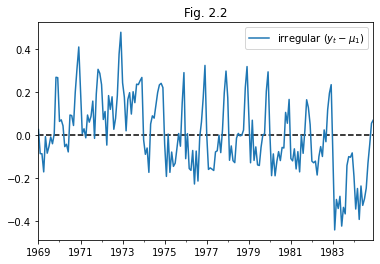

In [20]:
ax = pd.Series(dconstant_results.smoothed_measurement_disturbance[0], index=df_ukdrivers.index).plot(label='irregular ($y_t - \\mu_1$)')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 2.2')
ax.legend()

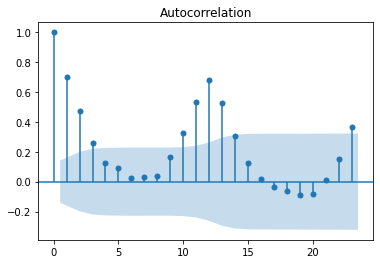

In [21]:
sm.tsa.graphics.plot_acf(dconstant_results.standardized_forecasts_error[0], alpha=0.05, fft=False);

**Diagnostic Tests**

Statistical tests based on standardized forecasts error $e_t$:

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
e_t = v_t / F_t,
\end{aligned}
$$

where

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
v_t &= y_t - Z E[\alpha_t|Y_{1:t}]\\
F_t &= {\rm Var}[v_t|Y_{1:t}]
\end{aligned}
$$

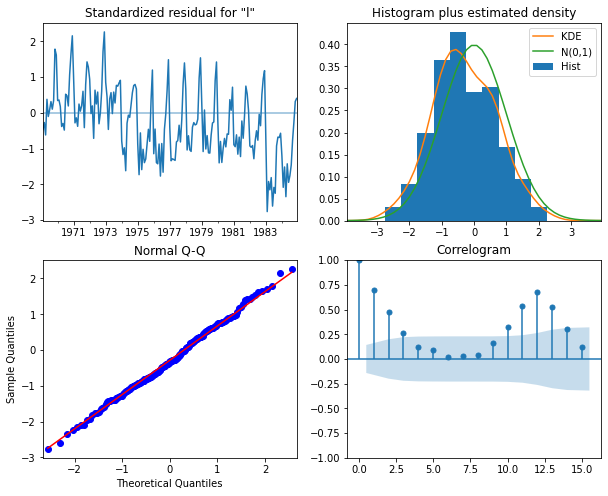

In [22]:
dconstant_results.plot_diagnostics(figsize=(10, 8), lags=15);

**Test 1. Independence**

- Box-Ljung statistics: $Q(k) \sim \chi^2(k - w +1)$
    - $w$ ... number of hyper parameters
- Autocorrelation: $r_k \sim N(0, 1/\sqrt{T})$

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
r_k &= \frac{\sum_{t=1}^{T-k}(e_t - \bar{e})(e_{t+k} - \bar{e})}{\sum_{t=1}^T (e_t - \bar{e})^2}\\
Q(k)&=T(T+2)\sum_{l=1}^{k}\frac{r_l^2}{T-l}
\end{aligned}
$$


In [23]:
# independence
print(f"Box-Ljung (95% threshold {chi2.ppf(0.95, df=15 - dconstant_results.df_model+1)}): ")
print("    ", dconstant_results.test_serial_correlation(method='ljungbox', lags=[15])[0, 0, 0])

acf_dconstant, acf_ci_dconstant = sm.tsa.acf(dconstant_results.standardized_forecasts_error[0], alpha=0.05, nlags=12, fft=False)

print(f"Autocorrelation (95% confidence interval = {acf_ci_dconstant[1] - acf_dconstant[1]})")
print("   lag=1: ", acf_dconstant[1])
print("   lag=12: ", acf_dconstant[12])

Box-Ljung (95% threshold 23.684791304840576): 
     415.2115627595994
Autocorrelation (95% confidence interval = [-0.14144822  0.14144822])
   lag=1:  0.697897803820078
   lag=12:  0.678006701734552


**Test 2. Heterokedasticity**

- $H(h)\sim F(h,h)$

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
H(h) &= \frac{\sum_{t=T-h+1}^{T}e_t^2}{\sum_{t=d+1}^{d+h} e_t^2}\\
\end{aligned}
$$


$h$: round($T$)  
$d$: number of diffusive initialization parameters

In [24]:
# Heteroskedasticity
d = np.maximum(dconstant_results.loglikelihood_burn, dconstant_results.nobs_diffuse)
# h = int(np.round((dconstant_results.nobs - dconstant_results.df_model) / 3))
h = int(np.round((dconstant_results.nobs - d) / 3))
print(f"Heterokedasticity (95% threshold = {fdist.ppf(1-0.025, h,h)}): ")
print(" ", dconstant_results.test_heteroskedasticity(method='breakvar')[0,0])

Heterokedasticity (95% threshold = 1.639485158828104): 
  2.057693846379324


**Test 3. Normality**

 - $N \sim \chi^2(2)$
 
$$
\begin{aligned}
\end{aligned}
\begin{aligned}
N &= T\left(\frac{S^2}{6} + \frac{(K-3)^2}{24}\right)\\
\end{aligned}
$$

where

 $$
\begin{aligned}
\end{aligned}
\begin{aligned}
S &= \frac{\frac{1}{T}\sum_{t=1}^{T}(e_t - \bar{e})^3}{\sqrt{\left\{\frac{1}{T}\sum_{t=1}^{T}(e_t - \bar{e})^2\right\}^3}}\\
K &= \frac{\frac{1}{T}\sum_{t=1}^{T}(e_t - \bar{e})^4}{\left\{\frac{1}{T}\sum_{t=1}^{T}(e_t - \bar{e})^2\right\}^2}\\
\end{aligned}
$$


In [25]:
# Normality (Jarque-Bera)
print(f"Normality (95% threshold = {chi2.ppf(0.95, 2)})")
print("", dconstant_results.test_normality(method='jarquebera')[0,0])

Normality (95% threshold = 5.991464547107979)
 0.7332511028465183


In [26]:
def diagnostic_tests(results, alpha=0.05, lag_boxljung=15, nlags=[1,12]):
    tests_results = []
    d = np.maximum(results.loglikelihood_burn, results.nobs_diffuse)
    w = results.df_model - d
    
    # Independence
    ## Box-Ljung
    boxljung_result = {'': 'Independence', 'Statistics': f'Box-Ljung: Q({lag_boxljung})'}
    boxljung_result['Value'] = results.test_serial_correlation(method='ljungbox', lags=[lag_boxljung])[0, 0, 0]
    boxljung_result['Threshold'] = chi2.ppf(1-alpha, df=lag_boxljung - w +1)
    boxljung_result['Satisfy'] = boxljung_result['Value'] < boxljung_result['Threshold'] 
    tests_results.append(boxljung_result)
    
    ## autocorrelation
    acf, acf_ci = sm.tsa.acf(results.standardized_forecasts_error[0], alpha=alpha, nlags=max(nlags), fft=False)
    acf_threshold = acf_ci[1] - acf[1]
    for lag in nlags:
        acf_result = {'': 'Independence', 'Statistics': f'ACF(lag={lag}): r({lag})'}
        acf_result['Value'] = acf[lag]
        acf_result['Threshold'] = acf_threshold
        acf_result['Satisfy'] = (acf_result['Value'] >= acf_result['Threshold'][0]) & (acf_result['Value'] <= acf_result['Threshold'][1])
        tests_results.append(acf_result)
    
    # Heterokedasticity    
    # h = int(np.round((results.nobs - results.df_model) / 3))
    h = int(np.round((results.nobs - d) / 3))
    H_value = results.test_heteroskedasticity(method='breakvar')[0,0]
    if H_value >= 1:
        H_stats = f'H({h})'
        value = H_value
    else:
        H_stats = f'1/H({h})'
        value = 1/H_value
    hetero_result = {'': 'Heterokedasticity', 'Statistics': H_stats}
    hetero_result['Value'] = value
    hetero_result['Threshold'] = fdist.ppf(1-alpha/2, h,h)
    hetero_result['Satisfy'] = hetero_result['Value'] < hetero_result['Threshold']
    tests_results.append(hetero_result)
    
    # Normality
    normality_result = {'': 'Normality', 'Statistics': f'Jarque-Bera: N'}
    normality_result['Value'] = results.test_normality(method='jarquebera')[0,0]
    normality_result['Threshold'] = chi2.ppf(1-alpha, 2)
    normality_result['Satisfy'] = normality_result['Value'] < normality_result['Threshold']
    tests_results.append(normality_result)

    return tests_results

In [27]:
pd.DataFrame(diagnostic_tests(dconstant_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),415.211563,24.995790,False
1,Independence,ACF(lag=1): r(1),0.697898,"[-0.14144821675952146, 0.14144821675952146]",False
2,Independence,ACF(lag=12): r(12),0.678007,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(64),2.057694,1.639485,False
4,Normality,Jarque-Bera: N,0.733251,5.991465,True


**AIC (Akaike Information Criterion)**

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
{\rm AIC} = \frac{1}{T}\left\{ - 2 T \log L_d + 2(d + w)\right\}
\end{aligned}
$$

$L_d$: likelihood  
$d$: number of diffusive initialization parameters  
$w$: number of hyper parameters

In [28]:
# AIC
# (-2 * dconstant_results.llf + 2 * dconstant_results.df_model) / dconstant_results.nobs
dconstant_results.aic / dconstant_results.nobs

-0.6291137285361637

## Local Level Model

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)
\end{aligned}
$$

In [29]:
llevel_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='local level', use_exact_diffuse=True)

In [30]:
llevel_results = llevel_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.640410
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16


In [31]:
llevel_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:            log_drivers   No. Observations:                  192
Model:                    local level   Log Likelihood                 122.959
Date:                Sat, 20 Feb 2021   AIC                           -239.917
Time:                        21:28:16   BIC                           -230.145
Sample:                    01-31-1969   HQIC                          -235.959
                         - 12-31-1984                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0022      0.001      2.170      0.030       0.000       0.004
sigma2.level         0.0119      0.002      5.926      0.000       0.008       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                13.24
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.64
Prob(H) (two-sided):                  0.80   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

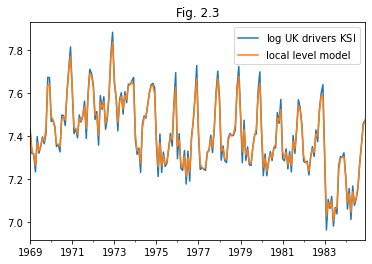

In [32]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(llevel_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='local level model')
ax.set_title('Fig. 2.3')
ax.legend()

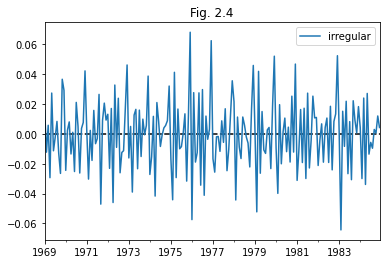

In [33]:
ax = pd.Series(llevel_results.smoothed_measurement_disturbance[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 2.4')
ax.legend()

In [34]:
pd.DataFrame(diagnostic_tests(llevel_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),105.385232,23.684791,False
1,Independence,ACF(lag=1): r(1),0.008586,"[-0.14144821675952146, 0.14144821675952146]",True
2,Independence,ACF(lag=12): r(12),0.537384,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(64),1.064007,1.639485,True
4,Normality,Jarque-Bera: N,13.242151,5.991465,False


In [35]:
# AIC
llevel_results.aic / llevel_results.nobs

-1.249569693038076

## Local Level Model and Fatalties in Norway

- A better example of local level model

In [36]:
llevel_model_norway = sm.tsa.UnobservedComponents(df_fatalties['log_Norwegian_fatalties'], level='local level', use_exact_diffuse=True)

In [37]:
llevel_results_norway = llevel_model_norway.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.819835
         Iterations: 9
         Function evaluations: 15
         Gradient evaluations: 15


In [38]:
llevel_results_norway.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                           
===================================================================================
Dep. Variable:     log_Norwegian_fatalties   No. Observations:                   34
Model:                         local level   Log Likelihood                  27.874
Date:                     Sat, 20 Feb 2021   AIC                            -49.749
Time:                             21:28:17   BIC                            -45.170
Sample:                         12-31-1970   HQIC                           -48.187
                              - 12-31-2003                                         
Covariance Type:                       opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0033      0.002      1.533      0.125      -0.001       0.007
sigma2.level         0.0047      0.003      1.638      0.101      -0.001       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.44   Prob(JB):                         0.55
Heteroskedasticity (H):               1.75   Skew:                             0.30
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

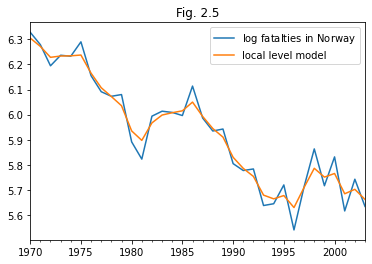

In [39]:
ax = df_fatalties['log_Norwegian_fatalties'].plot(label='$\log$ fatalties in Norway')
ax = pd.Series(llevel_results_norway.level['smoothed'], index=df_fatalties.index).plot(ax=ax, label='local level model')
ax.set_title('Fig. 2.5')
ax.legend()

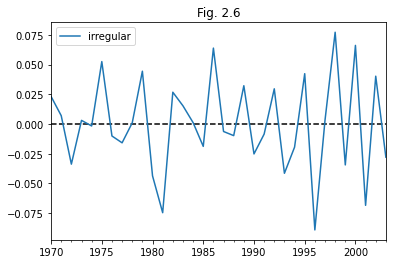

In [40]:
ax = pd.Series(llevel_results_norway.smoothed_measurement_disturbance[0], index=df_fatalties.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 2.6')
ax.legend()

In [41]:
pd.DataFrame(diagnostic_tests(llevel_results_norway, lag_boxljung=10, nlags=[1, 4]))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(10),6.227593,16.918978,True
1,Independence,ACF(lag=1): r(1),-0.128843,"[-0.33613105027889334, 0.33613105027889334]",True
2,Independence,ACF(lag=4): r(4),-0.102481,"[-0.33613105027889334, 0.33613105027889334]",True
3,Heterokedasticity,H(11),1.746441,3.473699,True
4,Normality,Jarque-Bera: N,1.190712,5.991465,True


In [42]:
# AIC
llevel_results_norway.aic / llevel_results_norway.nobs

-1.463198654856063

# Chapter 3: Local Linear Trend Model

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + v_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
v_{t+1} &= v_t + \zeta_t, \quad \zeta_t \sim N(0, \sigma_\zeta^2)\\
\end{aligned}
$$

## Deterministic Level and Deterministic Trend
$$
\begin{aligned}
\end{aligned}
\begin{aligned}
\xi_t &= 0, \, \zeta_t = 0\\
y_t &= \mu_1 + v_1(t-1) + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\end{aligned}
$$

... Same as linear regression in Chapter 1

In [43]:
dtrend_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='deterministic trend', use_exact_diffuse=True)

In [44]:
dtrend_results = dtrend_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.404501
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 9


In [45]:
dtrend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Unobserved Components Results                         
===============================================================================
Dep. Variable:             log_drivers   No. Observations:                  192
Model:             deterministic trend   Log Likelihood                  77.664
Date:                 Sat, 20 Feb 2021   AIC                           -149.328
Time:                         21:28:18   BIC                           -139.556
Sample:                     01-31-1969   HQIC                          -145.370
                          - 12-31-1984                                         
Covariance Type:                   opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0230      0.003      8.825      0.000       0.018       0.028
===================================================================================
Ljung-Box (L1) (Q):                  71.71   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.00   Prob(JB):                         0.41
Heteroskedasticity (H):               1.36   Skew:                             0.23
Prob(H) (two-sided):                  0.23   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

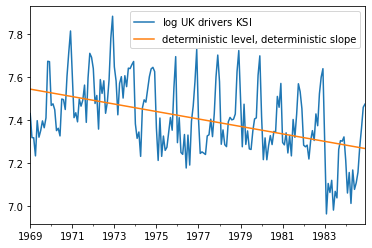

In [46]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dtrend_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level, deterministic slope')
ax.legend()

In [47]:
pd.DataFrame(diagnostic_tests(dtrend_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),305.681762,24.995790,False
1,Independence,ACF(lag=1): r(1),0.610367,"[-0.14144821675952146, 0.14144821675952146]",False
2,Independence,ACF(lag=12): r(12),0.629976,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(63),1.359898,1.646022,True
4,Normality,Jarque-Bera: N,1.789846,5.991465,True


In [48]:
# AIC
dtrend_results.aic / dtrend_results.nobs

-0.7777511310056114

## Stochastic Level and Stochastic Slope

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + v_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
v_{t+1} &= v_t + \zeta_t, \quad \zeta_t \sim N(0, \sigma_\zeta^2)\\
\end{aligned}
$$

In [49]:
lltrend_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='local linear trend', use_exact_diffuse=True)

In [50]:
lltrend_results = lltrend_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.615221
         Iterations: 20
         Function evaluations: 31
         Gradient evaluations: 31


In [51]:
lltrend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:            log_drivers   No. Observations:                  192
Model:             local linear trend   Log Likelihood                 118.122
Date:                Sat, 20 Feb 2021   AIC                           -226.245
Time:                        21:28:18   BIC                           -209.957
Sample:                    01-31-1969   HQIC                          -219.648
                         - 12-31-1984                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0021      0.001      1.773      0.076      -0.000       0.004
sigma2.level         0.0121      0.002      5.064      0.000       0.007       0.017
sigma2.trend      8.009e-21   1.93e-05   4.16e-16      1.000   -3.77e-05    3.77e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.95
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.68
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

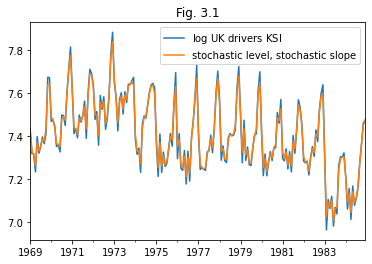

In [52]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(lltrend_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='stochastic level, stochastic slope')
ax.set_title('Fig. 3.1')
ax.legend()

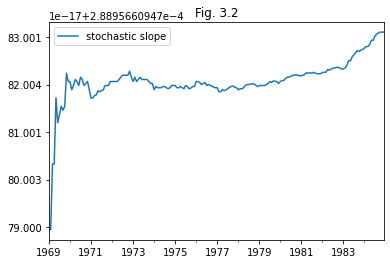

In [53]:
ax = pd.Series(lltrend_results.trend['smoothed'], index=df_ukdrivers.index).plot(label='stochastic slope')
ax.set_title('Fig. 3.2')
ax.legend()

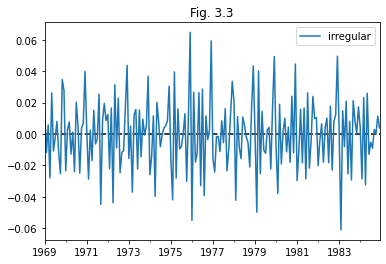

In [54]:
ax = pd.Series(lltrend_results.smoothed_measurement_disturbance[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 3.3')
ax.legend()

In [55]:
pd.DataFrame(diagnostic_tests(lltrend_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),100.609514,22.362032,False
1,Independence,ACF(lag=1): r(1),0.004765,"[-0.14144821675952146, 0.14144821675952146]",True
2,Independence,ACF(lag=12): r(12),0.532371,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(63),1.057827,1.646022,True
4,Normality,Jarque-Bera: N,14.945524,5.991465,False


In [56]:
# AIC
lltrend_results.aic / lltrend_results.nobs

-1.178359158872038

## Stochastic Level and Deterministic Slope

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + v_1 + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)
\end{aligned}
$$

In [57]:
lldtrend_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], level='local linear deterministic trend', use_exact_diffuse=True)

In [58]:
lldtrend_results = lldtrend_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.615221
         Iterations: 12
         Function evaluations: 17
         Gradient evaluations: 17


In [59]:
lldtrend_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               Unobserved Components Results                                
============================================================================================
Dep. Variable:                          log_drivers   No. Observations:                  192
Model:             local linear deterministic trend   Log Likelihood                 118.122
Date:                              Sat, 20 Feb 2021   AIC                           -228.245
Time:                                      21:28:19   BIC                           -215.215
Sample:                                  01-31-1969   HQIC                          -222.968
                                       - 12-31-1984                                         
Covariance Type:                                opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0021      0.001      2.044      0.041    8.67e-05       0.004
sigma2.level         0.0121      0.002      5.900      0.000       0.008       0.016
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.95
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.68
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

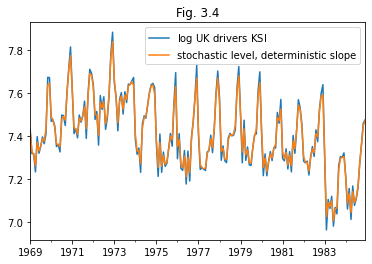

In [60]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(lldtrend_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='stochastic level, deterministic slope')
ax.set_title('Fig. 3.4')
ax.legend()

In [61]:
pd.DataFrame(diagnostic_tests(lldtrend_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),100.609505,23.684791,False
1,Independence,ACF(lag=1): r(1),0.004765,"[-0.14144821675952146, 0.14144821675952146]",True
2,Independence,ACF(lag=12): r(12),0.532371,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(63),1.057827,1.646022,True
4,Normality,Jarque-Bera: N,14.945524,5.991465,False


In [62]:
# AIC
## slightly better than lltrend model
lldtrend_results.aic / lldtrend_results.nobs

-1.1887758255387018

## Local Linear Trend Model and Fatalties in Finland

- A better example of local linear trend model

In [63]:
lltrend_model_finland = sm.tsa.UnobservedComponents(df_fatalties['log_Finnish_fatalties'], level='local linear trend', use_exact_diffuse=True)

In [64]:
lltrend_results_finland = lltrend_model_finland.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.732419
         Iterations: 23
         Function evaluations: 27
         Gradient evaluations: 27


In [65]:
lltrend_results_finland.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Unobserved Components Results                          
=================================================================================
Dep. Variable:     log_Finnish_fatalties   No. Observations:                   34
Model:                local linear trend   Log Likelihood                  24.902
Date:                   Sat, 20 Feb 2021   AIC                            -39.805
Time:                           21:28:19   BIC                            -32.173
Sample:                       12-31-1970   HQIC                           -37.202
                            - 12-31-2003                                         
Covariance Type:                     opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0032      0.003      0.984      0.325      -0.003       0.010
sigma2.level      9.821e-15      0.006   1.53e-12      1.000      -0.013       0.013
sigma2.trend         0.0015      0.001      1.094      0.274      -0.001       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.87   Prob(JB):                         0.72
Heteroskedasticity (H):               0.74   Skew:                            -0.22
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

... Because the variance of the stochastic level (`sigma2.level`) is close to 0, consider deterministic level and stochastic slope

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + v_t\\
v_{t+1} &= v_t + \zeta_t, \quad \zeta_t \sim N(0, \sigma_\zeta^2)\\
\end{aligned}
$$

In [66]:
strend_model_finland = sm.tsa.UnobservedComponents(df_fatalties['log_Finnish_fatalties'], level='smooth trend', use_exact_diffuse=True)

In [67]:
strend_results_finland = strend_model_finland.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.732419
         Iterations: 11
         Function evaluations: 16
         Gradient evaluations: 16


In [68]:
strend_results_finland.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Unobserved Components Results                          
=================================================================================
Dep. Variable:     log_Finnish_fatalties   No. Observations:                   34
Model:                      smooth trend   Log Likelihood                  24.902
Date:                   Sat, 20 Feb 2021   AIC                            -41.805
Time:                           21:28:19   BIC                            -35.699
Sample:                       12-31-1970   HQIC                           -39.722
                            - 12-31-2003                                         
Covariance Type:                     opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0032      0.001      2.365      0.018       0.001       0.006
sigma2.trend         0.0015      0.001      1.688      0.091      -0.000       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.64
Prob(Q):                              0.87   Prob(JB):                         0.72
Heteroskedasticity (H):               0.74   Skew:                            -0.22
Prob(H) (two-sided):                  0.63   Kurtosis:                         2.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

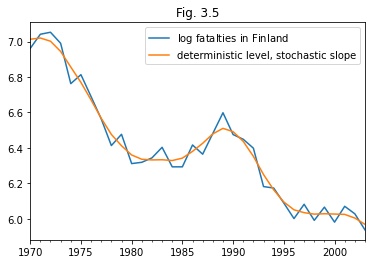

In [69]:
ax = df_fatalties['log_Finnish_fatalties'].plot(label='$\log$ fatalties in Finland')
ax = pd.Series(strend_results_finland.level['smoothed'], index=df_fatalties.index).plot(ax=ax, label='deterministic level, stochastic slope')
ax.set_title('Fig. 3.5')
ax.legend()

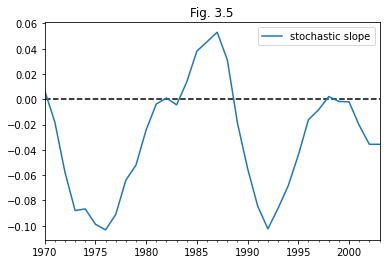

In [70]:
ax = pd.Series(strend_results_finland.trend['smoothed'], index=df_fatalties.index).plot(label='stochastic slope')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 3.5')
ax.legend()

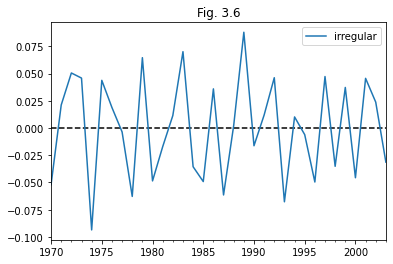

In [71]:
ax = pd.Series(strend_results_finland.smoothed_measurement_disturbance[0], index=df_fatalties.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 3.6')
ax.legend()

In [72]:
pd.DataFrame(diagnostic_tests(strend_results_finland, lag_boxljung=10, nlags=[1, 4]))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(10),7.043655,16.918978,True
1,Independence,ACF(lag=1): r(1),-0.029300,"[-0.33613105027889334, 0.33613105027889334]",True
2,Independence,ACF(lag=4): r(4),-0.097354,"[-0.33613105027889334, 0.33613105027889334]",True
3,Heterokedasticity,1/H(11),1.347890,3.473699,True
4,Normality,Jarque-Bera: N,0.644021,5.991465,True


In [73]:
# AIC
strend_results_finland.aic / strend_results_finland.nobs

-1.229544609853073

# Chapter 4: Local Level Model with Seasonality

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \gamma_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
\gamma_{t+1} &= - \sum_{k=0}^{s-2}\gamma_{t-k} + \omega_t, \quad \omega_t \sim N(0, \sigma_\omega^2)\\
\end{aligned}
$$

## Deterministic Level and Deterministic Seasonality





$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_1 + \gamma_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\gamma_{t+1} &= - \sum_{k=0}^{10}\gamma_{t-k}
\end{aligned}
$$

In [74]:
dconst_seasonal_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], 
                                                    level='deterministic constant',
                                                    seasonal=12, stochastic_seasonal=False, 
                                                    use_exact_diffuse=True)

In [75]:
dconst_seasonal_results = dconst_seasonal_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.406714
         Iterations: 3
         Function evaluations: 5
         Gradient evaluations: 5


In [76]:
dconst_seasonal_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Unobserved Components Results                           
==================================================================================
Dep. Variable:                log_drivers   No. Observations:                  192
Model:             deterministic constant   Log Likelihood                  78.089
                           + seasonal(12)   AIC                           -130.178
Date:                    Sat, 20 Feb 2021   BIC                            -87.831
Time:                            21:28:20   HQIC                          -113.027
Sample:                        01-31-1969                                         
                             - 12-31-1984                                         
Covariance Type:                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0176      0.002      9.556      0.000       0.014       0.021
===================================================================================
Ljung-Box (L1) (Q):                  95.99   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.00   Prob(JB):                         0.37
Heteroskedasticity (H):               3.40   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

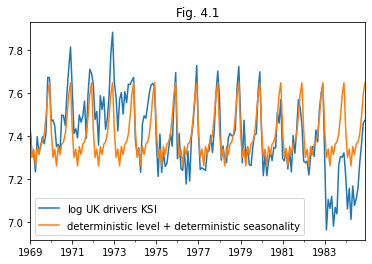

In [77]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dconst_seasonal_results.level['smoothed'] + dconst_seasonal_results.seasonal['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level + deterministic seasonality')
ax.set_title('Fig. 4.1')
ax.legend()

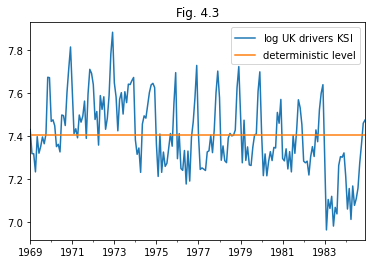

In [78]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dconst_seasonal_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level')
ax.set_title('Fig. 4.3')
ax.legend()

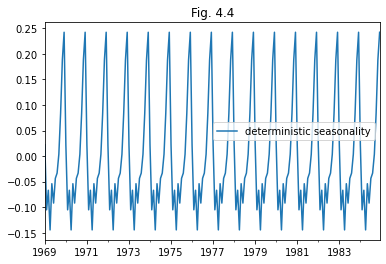

In [79]:
ax = pd.Series(dconst_seasonal_results.seasonal['smoothed'], index=df_ukdrivers.index).plot(label='deterministic seasonality')
ax.set_title('Fig. 4.4')
ax.legend()

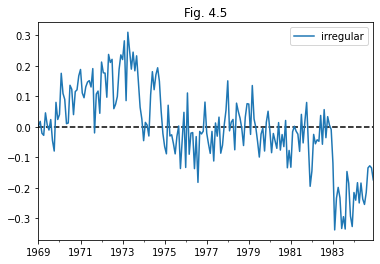

In [80]:
ax = pd.Series(dconst_seasonal_results.smoothed_measurement_disturbance[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 4.5')
ax.legend()

In [81]:
pd.DataFrame(diagnostic_tests(dconst_seasonal_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),751.575495,24.995790,False
1,Independence,ACF(lag=1): r(1),0.728910,"[-0.14144821675952146, 0.14144821675952146]",False
2,Independence,ACF(lag=12): r(12),0.456047,"[-0.14144821675952146, 0.14144821675952146]",False
3,Heterokedasticity,H(60),3.399617,1.666791,False
4,Normality,Jarque-Bera: N,1.971357,5.991465,True


In [82]:
# AIC
dconst_seasonal_results.aic / dconst_seasonal_results.nobs

-0.6780113918945901

In [83]:
# TODO:
# - ANOVA
# - Linear regression with dummy variables

## Stochastic Level and Stochastic Seasonality

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \gamma_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
\gamma_{t+1} &= - \sum_{k=0}^{10}\gamma_{t-k} + \omega_t, \quad \omega_t \sim N(0, \sigma_\omega^2)\\
\end{aligned}
$$

In [84]:
llevel_seasonal_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], 
                                                    level='local level', seasonal=12, 
                                                    use_exact_diffuse=True)

In [85]:
llevel_seasonal_results = llevel_seasonal_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.925563
         Iterations: 15
         Function evaluations: 22
         Gradient evaluations: 22


In [86]:
llevel_seasonal_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Unobserved Components Results                            
=====================================================================================
Dep. Variable:                   log_drivers   No. Observations:                  192
Model:                           local level   Log Likelihood                 177.708
                   + stochastic seasonal(12)   AIC                           -325.416
Date:                       Sat, 20 Feb 2021   BIC                           -276.554
Time:                               21:28:21   HQIC                          -305.627
Sample:                           01-31-1969                                         
                                - 12-31-1984                                         
Covariance Type:                         opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0035      0.001      6.044      0.000       0.002       0.005
sigma2.level         0.0009      0.000      3.633      0.000       0.000       0.001
sigma2.seasonal   4.348e-18   2.88e-05   1.51e-13      1.000   -5.64e-05    5.64e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):                 5.16
Prob(Q):                              0.58   Prob(JB):                         0.08
Heteroskedasticity (H):               1.09   Skew:                            -0.39
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

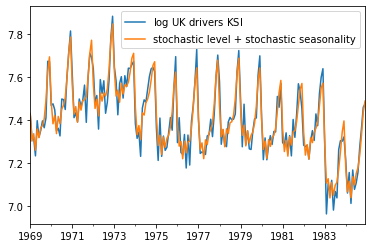

In [87]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(llevel_seasonal_results.level['smoothed'] + llevel_seasonal_results.seasonal['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='stochastic level + stochastic seasonality')
#ax.set_title('Fig. 4.1')
ax.legend()

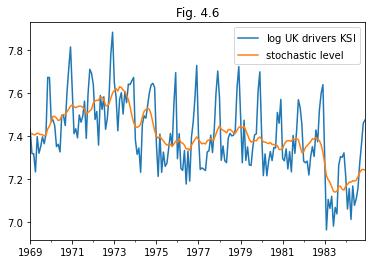

In [88]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(llevel_seasonal_results.level['smoothed'], index=df_ukdrivers.index).plot(ax=ax, label='stochastic level')
ax.set_title('Fig. 4.6')
ax.legend()

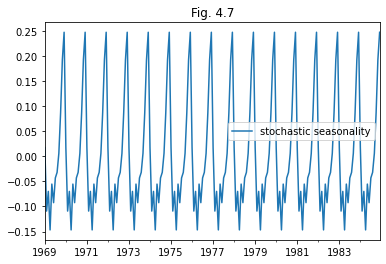

In [89]:
ax = pd.Series(llevel_seasonal_results.seasonal['smoothed'], index=df_ukdrivers.index).plot(label='stochastic seasonality')
ax.set_title('Fig. 4.7')
ax.legend()

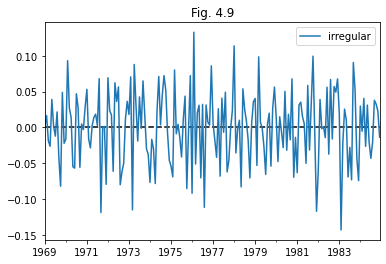

In [90]:
ax = pd.Series(llevel_seasonal_results.smoothed_measurement_disturbance[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 4.9')
ax.legend()

In [91]:
pd.DataFrame(diagnostic_tests(llevel_seasonal_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),14.370290,22.362032,True
1,Independence,ACF(lag=1): r(1),0.040510,"[-0.14144821675952146, 0.14144821675952146]",True
2,Independence,ACF(lag=12): r(12),0.033892,"[-0.14144821675952146, 0.14144821675952146]",True
3,Heterokedasticity,H(60),1.092754,1.666791,True
4,Normality,Jarque-Bera: N,5.156976,5.991465,True


In [92]:
# AIC
llevel_seasonal_results.aic / llevel_seasonal_results.nobs

-1.694875770884143

## Stochastic Level and Deterministic Seasonality

Because the variance of the seasonality is very small, fix $\omega_t = 0$.

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \gamma_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
\gamma_{t+1} &= - \sum_{k=0}^{10}\gamma_{t-k}
\end{aligned}
$$

In [93]:
llevel_dseasonal_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], 
                                                    level='local level', seasonal=12, stochastic_seasonal=False,
                                                    use_exact_diffuse=True)

In [94]:
llevel_dseasonal_results = llevel_dseasonal_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.925563
         Iterations: 7
         Function evaluations: 13
         Gradient evaluations: 13


Plots are almost the same as stochastic level + stochastic seasonal model.

In [95]:
pd.DataFrame(diagnostic_tests(llevel_dseasonal_results))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(15),14.370291,23.684791,True
1,Independence,ACF(lag=1): r(1),0.040510,"[-0.14144821675952146, 0.14144821675952146]",True
2,Independence,ACF(lag=12): r(12),0.033892,"[-0.14144821675952146, 0.14144821675952146]",True
3,Heterokedasticity,H(60),1.092754,1.666791,True
4,Normality,Jarque-Bera: N,5.156978,5.991465,True


AIC is smaller than stochastic level + stochastic seasonal model.

In [96]:
# AIC
llevel_dseasonal_results.aic / llevel_dseasonal_results.nobs

-1.7052924375507985

## Local Level and seasonality model with Inflation in England

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \gamma_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
\gamma_{t+1} &= - \gamma_t  - \gamma_{t-1} - \gamma_{t-2} + \omega_t, \quad \omega_t \sim N(0, \sigma_\omega^2)\\
\end{aligned}
$$

In [97]:
llevel_seasonal_model_ukinflation = sm.tsa.UnobservedComponents(df_ukinflation, 
                                                    level='local level', seasonal=4, 
                                                    use_exact_diffuse=True)

In [98]:
llevel_seasonal_results_ukinflation = llevel_seasonal_model_ukinflation.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -3.183706
         Iterations: 17
         Function evaluations: 30
         Gradient evaluations: 30


In [99]:
llevel_seasonal_results_ukinflation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:              q_price_changes   No. Observations:                  208
Model:                          local level   Log Likelihood                 662.211
                   + stochastic seasonal(4)   AIC                          -1310.422
Date:                      Sat, 20 Feb 2021   BIC                          -1287.059
Time:                              21:28:22   HQIC                         -1300.975
Sample:                          03-31-1950                                         
                               - 12-31-2001                                         
Covariance Type:                        opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  3.371e-05   4.72e-06      7.139      0.000    2.45e-05     4.3e-05
sigma2.level      2.124e-05   3.56e-06      5.973      0.000    1.43e-05    2.82e-05
sigma2.seasonal   4.349e-07   2.63e-07      1.651      0.099   -8.15e-08    9.51e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):               172.21
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

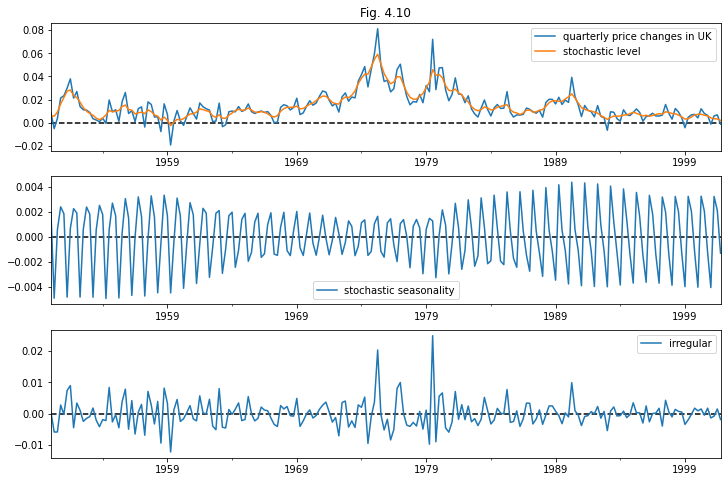

In [100]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))

ax = axes[0]
ax = df_ukinflation['q_price_changes'].plot(label='quarterly price changes in UK', ax=ax)
ax = pd.Series(llevel_seasonal_results_ukinflation.level['smoothed'] , 
               index=df_ukinflation.index
              ).plot(ax=ax, label='stochastic level')
ax.set_title('Fig. 4.10')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.legend()

ax = axes[1]
ax = pd.Series(llevel_seasonal_results_ukinflation.seasonal['smoothed'], index=df_ukinflation.index).plot(label='stochastic seasonality', ax=ax)
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.legend()

ax = axes[2]
ax = pd.Series(llevel_seasonal_results_ukinflation.smoothed_measurement_disturbance[0], index=df_ukinflation.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.legend()

In [101]:
pd.DataFrame(diagnostic_tests(llevel_seasonal_results_ukinflation, nlags=[1,4], lag_boxljung=10))

,,Statistics,Value,Threshold,Satisfy
0,Independence,Box-Ljung: Q(10),7.561126,15.507313,True
1,Independence,ACF(lag=1): r(1),0.049420,"[-0.13589905085234374, 0.13589905085234374]",True
2,Independence,ACF(lag=4): r(4),-0.061233,"[-0.13589905085234374, 0.13589905085234374]",True
3,Heterokedasticity,1/H(68),2.737333,1.615055,False
4,Normality,Jarque-Bera: N,172.205607,5.991465,False


In [102]:
# AIC
llevel_seasonal_results_ukinflation.aic / llevel_seasonal_results_ukinflation.nobs

-6.300104784692347

# Chapter 5. The Local Level Model with Explanatory Variable

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \beta_t x_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
\beta_{t+1} &= \beta_t + \tau_t, \quad \tau_t \sim N(0, \sigma_\tau^2)\\
\end{aligned}
$$

## Deterministic Level and Explanatory Variable

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_1 + \beta_1 x_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\end{aligned}
$$

In [103]:
dconst_exog_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], 
                                                level='deterministic constant', 
                                                exog=df_ukpetrol['log_petrol_price'],
                                                use_exact_diffuse=True)

In [104]:
dconst_exog_results = dconst_exog_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.448597
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12


In [105]:
dconst_exog_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Unobserved Components Results                           
==================================================================================
Dep. Variable:                log_drivers   No. Observations:                  192
Model:             deterministic constant   Log Likelihood                  86.131
Date:                    Sat, 20 Feb 2021   AIC                           -166.261
Time:                            21:28:23   BIC                           -156.489
Sample:                        01-31-1969   HQIC                          -162.303
                             - 12-31-1984                                         
Covariance Type:                      opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sigma2.irregular          0.0229      0.003      8.717      0.000       0.018       0.028
beta.log_petrol_price    -0.6717      0.089     -7.535      0.000      -0.846      -0.497
===================================================================================
Ljung-Box (L1) (Q):                  77.16   Jarque-Bera (JB):                 2.64
Prob(Q):                              0.00   Prob(JB):                         0.27
Heteroskedasticity (H):               1.90   Skew:                             0.25
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [106]:
mu1_dconst_exog = dconst_exog_results.level['smoothed'][0]
beta1_dconst_exog = dconst_exog_results.params['beta.log_petrol_price']

print(f'mu1: {mu1_dconst_exog}')
print(f'beta1: {beta1_dconst_exog}')

mu1: 5.878730734669619
beta1: -0.6716644566462014


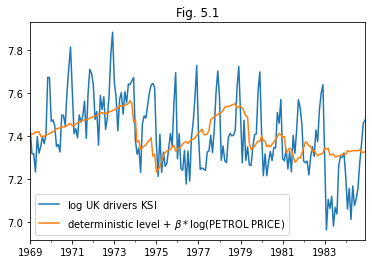

In [107]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dconst_exog_results.smoother_results.smoothed_forecasts[0], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level + $\\beta *\\log$(PETROL PRICE)')
ax.set_title('Fig. 5.1')
ax.legend()

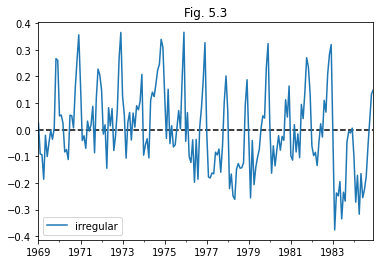

In [108]:
ax = pd.Series(dconst_exog_results.smoothed_measurement_disturbance[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 5.3')
ax.legend()

In [109]:
# AIC
dconst_exog_results.aic / dconst_exog_results.nobs

-0.8659431744772365

Results above are the same as linear regression

In [110]:
ols_driver_petrol_model = sm.OLS(df_ukdrivers['log_drivers'], sm.add_constant(df_ukpetrol, prepend=False))
ols_driver_petrol_result = ols_driver_petrol_model.fit()

In [111]:
ols_driver_petrol_result.params

log_petrol_price   -0.671664
const               5.878731
dtype: float64

Text(0.5, 1.0, 'Fig. 5.2')

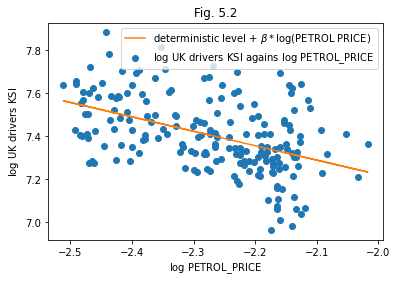

In [112]:
fig, ax = plt.subplots()
ax.scatter(df_ukpetrol, df_ukdrivers['log_drivers'], label='$\\log$ UK drivers KSI agains $\\log$ PETROL_PRICE')
ax.plot(df_ukpetrol, ols_driver_petrol_result.fittedvalues, color='tab:orange', label='deterministic level + $\\beta *\\log$(PETROL PRICE)')
ax.legend()
ax.set_xlabel('$\\log$ PETROL_PRICE')
ax.set_ylabel('$\\log$ UK drivers KSI')
ax.set_title('Fig. 5.2')

## Stochastic Level and Explanatory Variable

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \beta_1 x_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)
\end{aligned}
$$

In [113]:
llevel_exog_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], 
                                                level='local level', 
                                                exog=df_ukpetrol['log_petrol_price'],
                                                use_exact_diffuse=True)

In [114]:
llevel_exog_results = llevel_exog_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.642439
         Iterations: 13
         Function evaluations: 19
         Gradient evaluations: 19


In [115]:
llevel_exog_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:            log_drivers   No. Observations:                  192
Model:                    local level   Log Likelihood                 123.348
Date:                Sat, 20 Feb 2021   AIC                           -238.697
Time:                        21:28:24   BIC                           -225.667
Sample:                    01-31-1969   HQIC                          -233.419
                         - 12-31-1984                                         
Covariance Type:                  opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
sigma2.irregular          0.0024      0.001      2.312      0.021       0.000       0.004
sigma2.level              0.0116      0.002      5.895      0.000       0.008       0.015
beta.log_petrol_price    -0.2618      0.349     -0.750      0.454      -0.946       0.423
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                14.19
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.66
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
beta1_llevel_exog = llevel_exog_results.params['beta.log_petrol_price']
print('beta1: ', beta1_llevel_exog)

beta1:  -0.26178989013975107


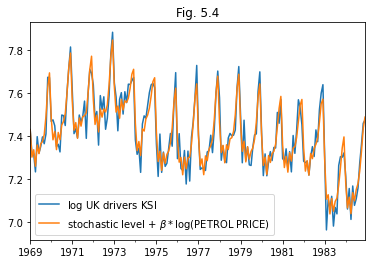

In [117]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(llevel_dseasonal_results.smoother_results.smoothed_forecasts[0], index=df_ukdrivers.index).plot(ax=ax, label='stochastic level + $\\beta *\\log$(PETROL PRICE)')
ax.set_title('Fig. 5.4')
ax.legend()

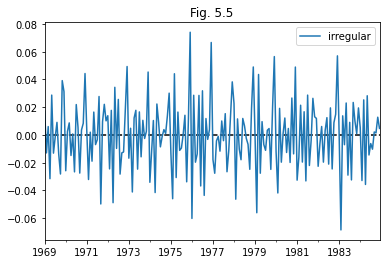

In [118]:
ax = pd.Series(llevel_exog_results.smoothed_measurement_disturbance[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 5.5')
ax.legend()

In [119]:
# AIC
llevel_exog_results.aic / llevel_exog_results.nobs

-1.2432113230404742

# Chapter 6. The Local Level Model with Intervention Variable

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \lambda_t w_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)\\
\lambda_{t+1} &= \lambda_t + \rho_t, \quad \rho_t \sim N(0, \sigma_\rho^2)\\
\end{aligned}
$$

where

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
w_t = 
\begin{cases}
0 \quad t < t_0\\
1 \quad t \ge t_0
\end{cases}
\end{aligned}
$$

Here, we look at the effect of the seat belt law introduced in Feb. 1983.

In [120]:
dummy_var_seatbelt = pd.Series(df_ukdrivers.index >= datetime.datetime(1983, 2,1), index=df_ukdrivers.index).astype(int)

## Deterministic Level and Intervention Variable

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_1 + \lambda_1 w_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\end{aligned}
$$

$w_t$ is 1 for $t\ge$ Feb. 1983.

In [121]:
dconst_intervention_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], 
                                                level='deterministic constant', 
                                                exog=dummy_var_seatbelt,
                                                use_exact_diffuse=True)

In [122]:
dconst_intervention_results = dconst_intervention_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.465547
         Iterations: 7
         Function evaluations: 11
         Gradient evaluations: 11


In [123]:
dconst_intervention_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Unobserved Components Results                           
==================================================================================
Dep. Variable:                log_drivers   No. Observations:                  192
Model:             deterministic constant   Log Likelihood                  89.385
Date:                    Sat, 20 Feb 2021   AIC                           -172.770
Time:                            21:28:24   BIC                           -162.997
Sample:                        01-31-1969   HQIC                          -168.812
                             - 12-31-1984                                         
Covariance Type:                      opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0221      0.003      7.963      0.000       0.017       0.028
beta.0              -0.2611      0.035     -7.400      0.000      -0.330      -0.192
===================================================================================
Ljung-Box (L1) (Q):                  76.74   Jarque-Bera (JB):                 6.44
Prob(Q):                              0.00   Prob(JB):                         0.04
Heteroskedasticity (H):               0.98   Skew:                             0.38
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [124]:
mu1_dconst_intervention = dconst_intervention_results.level['smoothed'][0]
beta1_dconst_intervention = dconst_intervention_results.params['beta.0']

print(f'mu1: {mu1_dconst_intervention}')
print(f'beta1: {beta1_dconst_intervention}')

mu1: 7.437386176063417
beta1: -0.26110808700312194


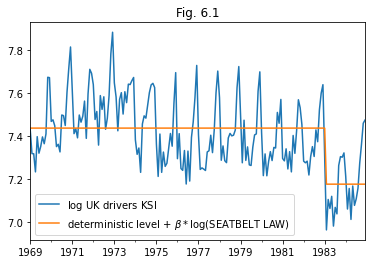

In [125]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(dconst_intervention_results.smoother_results.smoothed_forecasts[0], index=df_ukdrivers.index).plot(ax=ax, label='deterministic level + $\\beta *\\log$(SEATBELT LAW)')
ax.set_title('Fig. 6.1')
ax.legend()

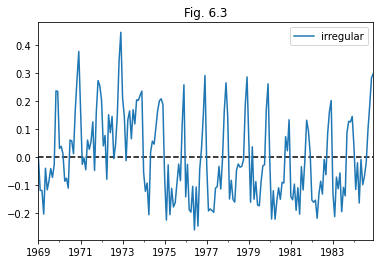

In [126]:
ax = pd.Series(dconst_intervention_results.smoothed_measurement_disturbance[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 6.3')
ax.legend()

In [127]:
# AIC
dconst_intervention_results.aic / dconst_intervention_results.nobs

-0.8998430485622695

Linear regression:

In [128]:
ols_driver_seatbelt_model = sm.OLS(df_ukdrivers['log_drivers'], sm.add_constant(dummy_var_seatbelt, prepend=False))
ols_driver_seatbelt_result = ols_driver_seatbelt_model.fit()

In [129]:
ols_driver_seatbelt_result.params

0       -0.261108
const    7.437386
dtype: float64

Text(0.5, 1.0, 'Fig. 5.2')

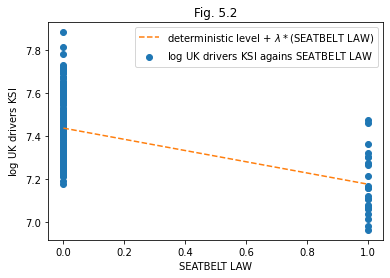

In [130]:
fig, ax = plt.subplots()
ax.scatter(dummy_var_seatbelt, df_ukdrivers['log_drivers'], label='$\\log$ UK drivers KSI agains SEATBELT LAW')
ax.plot(dummy_var_seatbelt, ols_driver_seatbelt_result.fittedvalues, linestyle='dashed', color='tab:orange', label='deterministic level + $\\lambda *$(SEATBELT LAW)')
ax.legend()
ax.set_xlabel('SEATBELT LAW')
ax.set_ylabel('$\\log$ UK drivers KSI')
ax.set_title('Fig. 5.2')

ANOVA

In [131]:
df_uk_all = df_ukdrivers[['log_drivers']].copy()
df_uk_all['seatbelt'] = dummy_var_seatbelt

In [132]:
model_lm = sm.formula.ols('log_drivers ~C(seatbelt)', data=df_uk_all)
result_lm = model_lm.fit()

In [133]:
sm.stats.anova_lm(result_lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(seatbelt),1.0,1.380237,1.380237,62.053667,2.508637e-13
Residual,190.0,4.226101,0.022243,NaN,NaN


## Stochastic Level and Intervention Variable

$$
\begin{aligned}
\end{aligned}
\begin{aligned}
y_t &= \mu_t + \lambda_1 w_t + \varepsilon_t, \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2)\\
\mu_{t+1} &= \mu_t + \xi_t, \quad \xi_t \sim N(0, \sigma_\xi^2)
\end{aligned}
$$

$w_t$ is 1 for $t\ge$ Feb. 1983.

In [134]:
llevel_intervention_model = sm.tsa.UnobservedComponents(df_ukdrivers['log_drivers'], 
                                                level='local level', 
                                                exog=dummy_var_seatbelt,
                                                use_exact_diffuse=True)

In [135]:
llevel_intervention_results = llevel_intervention_model.fit(method='bfgs')

Optimization terminated successfully.
         Current function value: -0.664483
         Iterations: 12
         Function evaluations: 18
         Gradient evaluations: 18


In [136]:
llevel_intervention_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Unobserved Components Results                         
==============================================================================
Dep. Variable:            log_drivers   No. Observations:                  192
Model:                    local level   Log Likelihood                 127.581
Date:                Sat, 20 Feb 2021   AIC                           -247.161
Time:                        21:28:25   BIC                           -234.131
Sample:                    01-31-1969   HQIC                          -241.884
                         - 12-31-1984                                         
Covariance Type:                  opg                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.0027      0.001      2.645      0.008       0.001       0.005
sigma2.level         0.0103      0.002      4.821      0.000       0.006       0.015
beta.0              -0.3787      0.447     -0.847      0.397      -1.255       0.498
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 9.97
Prob(Q):                              0.86   Prob(JB):                         0.01
Heteroskedasticity (H):               0.91   Skew:                            -0.56
Prob(H) (two-sided):                  0.71   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [137]:
beta1_llevel_intervention = llevel_intervention_results.params['beta.0']
print('beta1: ', beta1_llevel_intervention)

beta1:  -0.37871078270810266


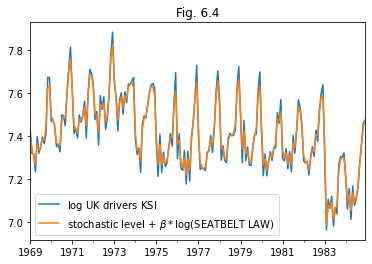

In [138]:
ax = df_ukdrivers['log_drivers'].plot(label='$\log$ UK drivers KSI')
ax = pd.Series(llevel_intervention_results.smoother_results.smoothed_forecasts[0], index=df_ukdrivers.index).plot(ax=ax, label='stochastic level + $\\beta *\\log$(SEATBELT LAW)')
ax.set_title('Fig. 6.4')
ax.legend()

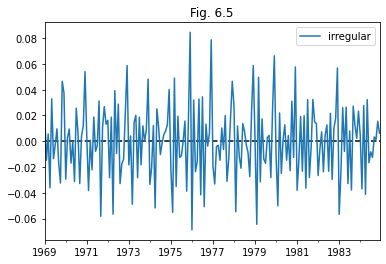

In [139]:
ax = pd.Series(llevel_intervention_results.smoothed_measurement_disturbance[0], index=df_ukdrivers.index).plot(label='irregular')
ax.hlines(0, *ax.get_xlim(), linestyle='dashed', color='black')
ax.set_title('Fig. 6.5')
ax.legend()

In [140]:
# AIC
llevel_intervention_results.aic / llevel_intervention_results.nobs

-1.2872992914697163